<a href="https://colab.research.google.com/github/IlaSharma9/Connected-Minds/blob/main/Anomaly_Detection_in_Cellular_network_ila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [5]:
data_train = pd.read_csv("/content/ML-MATT-CompetitionQT1920_train.csv",encoding='windows-1252')
data_test = pd.read_csv("/ML-MATT-CompetitionQT1920_test.csv", encoding='windows-1252')

print(data_train.shape)
print(data_test.shape)

(36904, 14)
(9158, 13)


In [6]:
data_train.head(10)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0
5,13:30,9ALTE,15.966,1.819,0.415,0.071,10.116,0.706,1.364,1.314,6.0,5.0,11,0
6,20:00,9BLTE,7.074,0.505,0.032,0.012,1.680,0.131,1.041,1.041,3.0,3.0,6,0
7,8:00,4BLTE,7.960,1.393,0.299,0.025,24.697,0.451,1.075,1.015,3.0,3.0,6,1
8,16:45,4CLTE,26.879,3.032,0.525,0.120,9.145,0.894,1.425,1.273,6.0,5.0,11,0
9,4:15,6CLTE,4.143,0.505,0.021,0.013,0.409,0.437,1.021,0.010,2.0,2.0,4,0


In [7]:
data_test.head(10)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.781,1.493,0.575,0.042,22.659,0.743,0.985,0.010,3.0,2.0,5.0
1,20:30,6ULTE,2.021,3.335,0.569,0.075,29.265,1.049,1.314,0.010,6.0,3.0,9.0
2,11:30,2ALTE,0.505,0.404,0.014,0.010,0.227,0.097,1.011,0.010,2.0,1.0,3.0
3,6:45,3CLTE,1.011,0.505,0.238,0.021,20.962,0.609,1.011,1.011,2.0,1.0,3.0
4,15:45,6CLTE,3.881,0.498,0.076,0.041,3.936,1.768,1.025,0.010,3.0,2.0,5.0
5,23:45,7CLTE,0.199,0.697,0.487,0.018,29.461,0.670,1.045,0.010,3.0,2.0,5.0
6,9:15,1BLTE,9.297,1.718,0.754,0.074,15.944,2.416,1.192,1.041,4.0,3.0,7.0
7,21:30,3CLTE,6.568,2.324,0.699,0.058,32.333,1.186,1.112,1.021,4.0,3.0,7.0
8,2:00,2ALTE,0.000,0.404,0.003,0.003,0.003,0.003,1.011,0.010,1.0,1.0,2.0
9,11:45,3ALTE,14.627,1.891,0.440,0.065,14.611,0.696,1.254,1.124,5.0,4.0,9.0


In [8]:
data_train.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


In [9]:
data_test.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
count,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9156.000000,9156.000000,9156.000000
mean,7.731205,2.060441,0.553921,0.063983,17.586196,1.804874,1.173203,0.660564,4.166448,3.037789,7.204238
std,8.375197,2.250347,0.731108,0.107254,15.911279,5.119961,0.202514,0.534836,1.766189,1.376915,3.034304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.112000,0.707000,0.133000,0.021000,5.360750,0.354000,1.041000,0.010000,3.000000,2.000000,5.000000
50%,4.345000,1.314000,0.341000,0.039000,13.759000,0.699000,1.112000,1.011000,4.000000,3.000000,7.000000
75%,12.025000,2.728000,0.715000,0.073000,24.980500,1.257000,1.254000,1.051000,5.000000,4.000000,9.000000
max,46.887000,77.303000,15.030000,2.991000,118.269000,47.118000,2.930000,2.162000,11.000000,10.000000,21.000000


In [10]:
data_train = data_train.drop(columns=['CellName','Time'], axis=1)
data_test = data_test.drop(columns=['CellName','Time'], axis=1)

We have an unusual value in **maxUE_UL+DL** column of our dataframe , so we need to handle this by removing and replacing values

In [11]:
data_train[data_train.eq('#¡VALOR!').any(1)]

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
51,13.743,4.042,2.113,0.100,44.483,1.110,0.0,0.0,NaN,NaN,#¡VALOR!,0
1290,22.837,2.324,0.500,0.090,24.374,0.847,0.0,0.0,NaN,NaN,#¡VALOR!,0
2082,0.199,1.791,0.693,0.032,15.634,0.353,0.0,0.0,NaN,NaN,#¡VALOR!,1
2842,9.903,1.516,0.466,0.032,24.576,0.931,0.0,0.0,NaN,NaN,#¡VALOR!,0
3384,0.404,0.909,0.216,0.042,9.730,2.714,0.0,0.0,NaN,NaN,#¡VALOR!,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36036,1.516,0.505,0.078,0.013,1.298,0.267,0.0,0.0,NaN,NaN,#¡VALOR!,0
36046,15.360,2.829,1.149,0.071,39.615,0.947,0.0,0.0,NaN,NaN,#¡VALOR!,0
36317,30.921,4.042,1.450,0.175,26.369,1.487,0.0,0.0,NaN,NaN,#¡VALOR!,0
36652,0.606,1.819,0.255,0.027,14.546,0.820,0.0,0.0,NaN,NaN,#¡VALOR!,0


In [12]:
data_train['maxUE_UL+DL'].value_counts()['#¡VALOR!']

84

In [13]:
data_test[data_test.eq('#¡VALOR!').any(1)]

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL


**Now we understand that the value '#¡VALOR!' needs to be replaced by a numeric value**

In [14]:
data_train['maxUE_UL+DL'].unique()

array(['7', '10', '2', '4', '3', '11', '6', '8', '5', '9', '12',
       '#¡VALOR!', '14', '17', '0', '13', '15', '16', '18', '19', '1',
       '20', '23', nan, '21'], dtype=object)

**We will replace the value '#¡VALOR!' by 0**

In [15]:
data_train['maxUE_UL+DL'] = data_train['maxUE_UL+DL'].replace('#¡VALOR!',0)

In [16]:
data_train['maxUE_UL+DL']

0         7
1        10
2         2
3         4
4         3
         ..
36899     7
36900     6
36901     7
36902     9
36903    10
Name: maxUE_UL+DL, Length: 36904, dtype: object

In [17]:
data_train[data_train.eq('#¡VALOR!').any(1)]

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual


**We have finally replaced the value and now we will proceed with Normalization**

**Normalization of training dataset**

In [18]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_train)

df_train = pd.DataFrame(np_scaled, columns = data_train.columns)
df_train

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,0.226794,0.017973,0.018877,0.003290,0.111815,0.013346,0.382161,0.384183,0.333333,0.250000,0.304348,1.0
1,0.424503,0.024398,0.027397,0.021507,0.073374,0.023916,0.464151,0.406672,0.500000,0.333333,0.434783,1.0
2,0.009701,0.005135,0.000765,0.000803,0.001871,0.003399,0.341338,0.372939,0.083333,0.083333,0.086957,1.0
3,0.036838,0.014128,0.047957,0.001926,0.433654,0.017097,0.355060,0.372939,0.166667,0.166667,0.173913,1.0
4,0.005903,0.005213,0.000816,0.001043,0.002486,0.003482,0.346827,0.378936,0.166667,0.083333,0.130435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36899,0.147644,0.010425,0.008367,0.002969,0.056997,0.007772,0.377702,0.003748,0.333333,0.250000,0.304348,0.0
36900,0.177176,0.015651,0.009642,0.002408,0.139349,0.032806,0.384906,0.386432,0.333333,0.166667,0.260870,0.0
36901,0.085286,0.011561,0.017397,0.002408,0.085974,0.011191,0.365352,0.376687,0.333333,0.250000,0.304348,1.0
36902,0.259852,0.035198,0.028519,0.005216,0.201324,0.018527,0.419554,0.397676,0.416667,0.333333,0.391304,0.0


**Normalization of test Dataset**

In [19]:
np = min_max_scaler.fit_transform(data_test)

df_test = pd.DataFrame(np, columns = data_test.columns)
df_test

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,0.080641,0.019314,0.038257,0.014042,0.191589,0.015769,0.336177,0.004625,0.272727,0.2,0.238095
1,0.043104,0.043142,0.037858,0.025075,0.247444,0.022263,0.448464,0.004625,0.545455,0.3,0.428571
2,0.010771,0.005226,0.000931,0.003343,0.001919,0.002059,0.345051,0.004625,0.181818,0.1,0.142857
3,0.021562,0.006533,0.015835,0.007021,0.177240,0.012925,0.345051,0.467623,0.181818,0.1,0.142857
4,0.082773,0.006442,0.005057,0.013708,0.033280,0.037523,0.349829,0.004625,0.272727,0.2,0.238095
...,...,...,...,...,...,...,...,...,...,...,...
9153,0.150873,0.013078,0.022954,0.015714,0.148610,0.019674,0.393174,0.476873,0.454545,0.3,0.380952
9154,0.002133,0.006442,0.003127,0.003678,0.040416,0.007237,0.356655,0.004625,0.272727,0.2,0.238095
9155,0.025871,0.006533,0.013906,0.008024,0.056820,0.008935,0.348464,0.467623,0.181818,0.1,0.142857
9156,0.116386,0.014385,0.031537,0.007690,0.038962,0.006367,0.365529,0.472248,0.363636,0.2,0.285714


**Missing values**

In [20]:
b = [0,1,2,3,4,5,6,7,8,9]
print(b[::3])

[0, 3, 6, 9]


In [21]:
a = data_train.isnull().sum()
b = data_test.isnull().sum()
missing_value_feature_all_data = []

def find_missing(df):
  for i in df.index:
    
    if df[i] != 0:
      missing_value_feature_all_data.append(i)

  print(missing_value_feature_all_data)

find_missing(a)

['maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']


In [22]:
find_missing(b)

['maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL', 'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']


In [23]:
data_train.isnull().sum() * 100 / len(data_train)

PRBUsageUL     0.000000
PRBUsageDL     0.000000
meanThr_DL     0.000000
meanThr_UL     0.000000
maxThr_DL      0.000000
maxThr_UL      0.000000
meanUE_DL      0.000000
meanUE_UL      0.000000
maxUE_DL       0.241166
maxUE_UL       0.241166
maxUE_UL+DL    0.013549
Unusual        0.000000
dtype: float64

In [24]:
data_test.isnull().sum() * 100 / len(data_test)

PRBUsageUL     0.000000
PRBUsageDL     0.000000
meanThr_DL     0.000000
meanThr_UL     0.000000
maxThr_DL      0.000000
maxThr_UL      0.000000
meanUE_DL      0.000000
meanUE_UL      0.000000
maxUE_DL       0.021839
maxUE_UL       0.021839
maxUE_UL+DL    0.021839
dtype: float64

**Handling missing values**

In [25]:
data_train = data_train.fillna(method='ffill').fillna(method='bfill')
data_test = data_test.fillna(method='ffill').fillna(method='bfill')

In [26]:
x = data_train.drop(columns = ['Unusual'], axis = 1)
y = data_train['Unusual']

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state = 1)

In [27]:
X = data_train.drop(columns = ['Unusual'], axis = 1)
y = data_train['Unusual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [29]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 72.07%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.723771     0.201299  0.720657      0.462535      0.579683
recall         0.993425     0.004351  0.720657      0.498888      0.720657
f1-score       0.837426     0.008519  0.720657      0.422973      0.608828
support    18708.000000  7124.000000  0.720657  25832.000000  25832.000000
_______________________________________________
Confusion Matrix: 
 [[18585   123]
 [ 7093    31]]

Test Result:
Accuracy Score: 71.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.723263     0.210526  0.719743      0.466895      0.581603
recall        0.992512     0.005230  0.719743      0.498871      0.719743
f1-score      0.836762     0.010207  0.719743      0.423484      0.608399
support    801

**Checking imbalance in target variable**

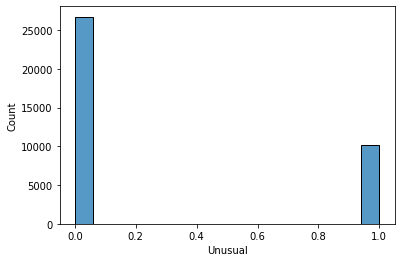

In [30]:
sns.histplot(data_train['Unusual'])

In [31]:
def over_sample_train_test(x,y):
    ros=RandomOverSampler(random_state=10)
    ros.fit(x,y)
    x_res,y_res=ros.fit_resample(x,y)
    x_train,x_val,y_train,y_val=train_test_split(x_res,y_res,test_size=0.3,random_state = 1)
#     x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state = 1) # if without oversampling
    return x_train,x_val,y_train,y_val

x = data_train.drop(columns = ['Unusual'], axis = 1)
y = data_train.Unusual
x_train,x_val,y_train,y_val = over_sample_train_test(x, y)

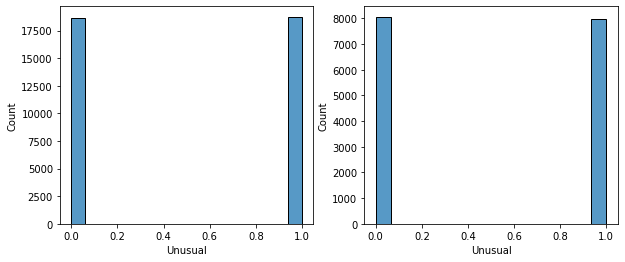

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
sns.histplot(y_train, ax = ax1)
sns.histplot(y_val, ax = ax2)

**Logistic Regression**

Logistic Regression

Train Score:   0.5790852468657275
Validation Score:    0.5783696126738601

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      8065
           1       0.56      0.67      0.61      7968

    accuracy                           0.58     16033
   macro avg       0.58      0.58      0.58     16033
weighted avg       0.58      0.58      0.57     16033



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


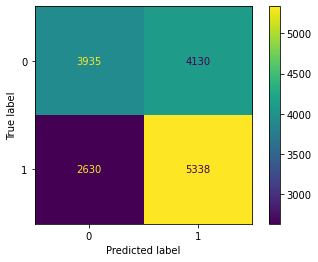

In [33]:
# lr = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.05, random_state = 42, max_iter = 1000)
regulation_parameter = 0.005
lr = LogisticRegression(solver='liblinear', C = regulation_parameter, random_state = 42, max_iter = 1000)

def apply_model(model,x_train,x_val,y_train,y_val):
    print('Logistic Regression')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_val)
    print('')
    print('Train Score:  ',model.score(x_train,y_train))
    print('Validation Score:   ',model.score(x_val,y_val))
    print('')
    plot_confusion_matrix(model, x_val, y_val)
    print(classification_report(y_val,y_pred))

apply_model(lr, x_train,x_val,y_train,y_val)

Logistic Regression

Train Score:   0.6248763666497367
Validation Score:    0.6211563649971933



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.68      0.46      0.55      8065
           1       0.59      0.78      0.67      7968

    accuracy                           0.62     16033
   macro avg       0.64      0.62      0.61     16033
weighted avg       0.64      0.62      0.61     16033



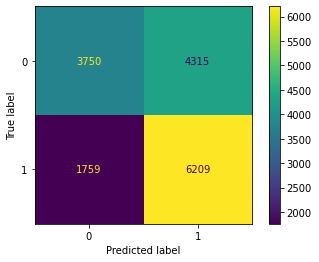

In [34]:
lasso = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.05, random_state = 42, max_iter = 1000)


def apply_model(model,x_train,x_val,y_train,y_val):
    print('Logistic Regression')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_val)
    print('')
    print('Train Score:  ',model.score(x_train,y_train))
    print('Validation Score:   ',model.score(x_val,y_val))
    print('')
    plot_confusion_matrix(model, x_val, y_val)
    print(classification_report(y_val,y_pred))

apply_model(lasso, x_train,x_val,y_train,y_val)

**Neural Network**

In [35]:
X = data_train.drop(columns = ['Unusual'], axis = 1)
y = data_train['Unusual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
d = X_train.shape[1]  # second index = 11
batch_size = len(X_train)  # = N train. Whole training dataset used per epoch

# Print shapes / dataset lengths

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Scale inputs to improve loss convergence

X_train = preprocessing.scale(X_train, axis=0, with_mean=True, with_std=True, copy= False)
X_test = preprocessing.scale(X_test, axis=0,with_mean=True,with_std = True, copy = False)

(29523, 11) (29523,)
(7381, 11) (7381,)


In [37]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)

mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

<ipython-input-37-e64f2c8e39cf>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


Epoch 1/100
616/616 [==============================] - 2s 2ms/step - loss: 0.5952 - accuracy: 0.7255
Epoch 2/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5649 - accuracy: 0.7256
Epoch 3/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5612 - accuracy: 0.7256
Epoch 4/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5575 - accuracy: 0.7256
Epoch 5/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7256
Epoch 6/100
616/616 [==============================] - 2s 3ms/step - loss: 0.5508 - accuracy: 0.7256
Epoch 7/100
616/616 [==============================] - 2s 3ms/step - loss: 0.5485 - accuracy: 0.7256
Epoch 8/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.7256
Epoch 9/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5456 - accuracy: 0.7256
Epoch 10/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5444 - accura

**Changing the neurons in 1st and 2nd layer from (8,4,1) to (6,6,1)**

In [38]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)

mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100


<ipython-input-38-53aaa1828ffa>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


616/616 [==============================] - 2s 2ms/step - loss: 0.5954 - accuracy: 0.7251
Epoch 2/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.7256
Epoch 3/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5630 - accuracy: 0.7256
Epoch 4/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5608 - accuracy: 0.7256
Epoch 5/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7256
Epoch 6/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7256
Epoch 7/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7256
Epoch 8/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.7256
Epoch 9/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7256
Epoch 10/100
616/616 [==============================] - 2s 3ms/step - loss: 0.5489 - accuracy: 0.7256
E

**Increasing one more layer in the neural network to change shape from (6,6,1) to (6,4,2,1)**

In [39]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)

mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100


<ipython-input-39-319277fafabf>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


616/616 [==============================] - 2s 2ms/step - loss: 0.6462 - accuracy: 0.7253
Epoch 2/100
616/616 [==============================] - 1s 2ms/step - loss: 0.6007 - accuracy: 0.7256
Epoch 3/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5896 - accuracy: 0.7256
Epoch 4/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5878 - accuracy: 0.7256
Epoch 5/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5877 - accuracy: 0.7256
Epoch 6/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7256
Epoch 7/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7256
Epoch 8/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7256
Epoch 9/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7256
Epoch 10/100
616/616 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7256
E